Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 172s 12s/step - accuracy: 0.2451 - loss: 4.0470 - val_accuracy: 0.5963 - val_loss: 1.0552
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 205s 12s/step - accuracy: 0.5612 - loss: 1.1537 - val_accuracy: 0.7615 - val_loss: 0.8226
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 174s 12s/step - accuracy: 0.6832 - loss: 0.8681 - val_accuracy: 0.8349 - val_loss: 0.6162
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 193s 12s/step - accuracy: 0.7975 - loss: 0.6034 - val_accuracy: 0.8257 - val_loss: 0.4844
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 203s 12s/step - accuracy: 0.8463 - loss: 0.4766 - val_accuracy: 0.8716 - val_loss: 0.3921
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 201s 12s/step - accuracy: 0.8698 - loss: 0.3994 - val_accuracy: 0.8532 - val_loss: 0.4188
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 165s 12s/step - accuracy: 0.8720 - loss: 0.3552 - val_accuracy: 0.8440 - val_loss: 0.4085
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 165s 12s/step - accuracy: 0.8740 - loss: 0.3330 - val_accuracy: 0.8349 - val_

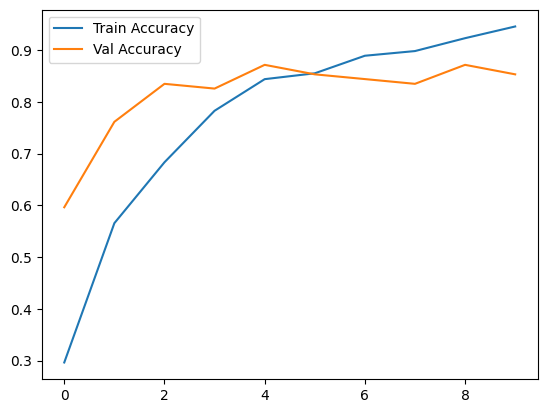

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

dataset_path = "/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess"

datagen = ImageDataGenerator(
    rescale=1.0/255, 
    validation_split=0.2  
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_data, validation_data=val_data, epochs=10)

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.show()
model.save("chess_piece_classifier_vgg.h5")
